In [8]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization, Dropout
from sklearn.utils import shuffle

BATCH_SIZE = 20

In [9]:
data = np.random.uniform(0.1, 0.3, size=(80,))
data2 = np.random.uniform(0.3, 0.6, size=(80,))

data[64] = 0.5
data[65] = 1
data[66] = 0.5

data2[19] = 0.4
data2[20] = 0
data2[21] = 0.4
data = list(zip(data, data2))
data

[(0.14676955003976758, 0.5528042872718415),
 (0.19727010926896626, 0.4573070357675814),
 (0.17704063593672875, 0.5252938494200137),
 (0.23986375051780057, 0.4174252599052375),
 (0.16020124935230481, 0.3862476603665781),
 (0.19221491755788653, 0.46278006451062015),
 (0.21203104100425268, 0.5873546651227559),
 (0.1213481105291209, 0.31322739592278964),
 (0.21007795154978737, 0.46679076328924585),
 (0.12705456495610204, 0.5003878010250115),
 (0.13511715587377374, 0.5324341293483732),
 (0.28694029718861713, 0.519545195628258),
 (0.22546411923328605, 0.5259576207622951),
 (0.2955325168981155, 0.5726560101076483),
 (0.1594974338734335, 0.33627878171856374),
 (0.2261182688588164, 0.5263735291766336),
 (0.11313554218103741, 0.3210357159410115),
 (0.14167919449112049, 0.47803812970315873),
 (0.27411971472876884, 0.5286092262649686),
 (0.24145696411229245, 0.4),
 (0.2747263650121191, 0.0),
 (0.12778473957987785, 0.4),
 (0.19244925534485624, 0.43175626013252755),
 (0.23424274281526117, 0.58738710

In [10]:
def to_split(arr):
    i = 0
    margin = math.floor(BATCH_SIZE / 20)
    if margin < 1:
        margin = 1
    x = []
    y = []
    while i < len(arr) - BATCH_SIZE:
        segment = arr[i:i+BATCH_SIZE]
        is_one = 0
        is_zero = 0
        for j in range(margin, BATCH_SIZE-margin):
            if segment[j][0] == 1.:
                is_one = 1
                print(f"one at {j} ({i}) (({i+j}))")
            if segment[j][1] == 0:
                is_zero = 1
                print(f"zero at {j} ({i}) (({i+j}))")
        if len(segment) == BATCH_SIZE:
            x.append(segment)
            y.append((1 if is_one else 0, 1 if is_zero else 0))
        i += margin

    x, y = shuffle(x, y, random_state=0)
    return np.array(x), np.array(y)

x, y = to_split(data)

zero at 18 (2) ((20))
zero at 17 (3) ((20))
zero at 16 (4) ((20))
zero at 15 (5) ((20))
zero at 14 (6) ((20))
zero at 13 (7) ((20))
zero at 12 (8) ((20))
zero at 11 (9) ((20))
zero at 10 (10) ((20))
zero at 9 (11) ((20))
zero at 8 (12) ((20))
zero at 7 (13) ((20))
zero at 6 (14) ((20))
zero at 5 (15) ((20))
zero at 4 (16) ((20))
zero at 3 (17) ((20))
zero at 2 (18) ((20))
zero at 1 (19) ((20))
one at 18 (47) ((65))
one at 17 (48) ((65))
one at 16 (49) ((65))
one at 15 (50) ((65))
one at 14 (51) ((65))
one at 13 (52) ((65))
one at 12 (53) ((65))
one at 11 (54) ((65))
one at 10 (55) ((65))
one at 9 (56) ((65))
one at 8 (57) ((65))
one at 7 (58) ((65))
one at 6 (59) ((65))


In [11]:
X_train, X_test = x[:int(len(x) * 0.5)], x[int(len(x) * 0.5):]
Y_train, Y_test = y[:int(len(y) * 0.5)], y[int(len(y) * 0.5):]
print(f"Train 1s: {np.mean(Y_train == 1) * 100:.2f}, Test 1s: {np.mean(Y_test == 1) * 100:.2f}")

Train 1s: 25.00, Test 1s: 26.67


In [12]:
model = Sequential()
model.add(LSTM(BATCH_SIZE * 10, input_shape=(X_train.shape[1], 2), activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(BATCH_SIZE * 10, activation='relu'),)
model.add(Dense(BATCH_SIZE * 5, activation='relu'),)
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=160, batch_size=8)


Epoch 1/160
4/4 [==============================] - 2s 377ms/step - loss: 0.6757 - accuracy: 0.4333 - val_loss: 0.6472 - val_accuracy: 0.3000
Epoch 2/160
4/4 [==============================] - 1s 271ms/step - loss: 0.6168 - accuracy: 0.3667 - val_loss: 0.5952 - val_accuracy: 0.3000
Epoch 3/160
4/4 [==============================] - 1s 250ms/step - loss: 0.5645 - accuracy: 0.3333 - val_loss: 0.5860 - val_accuracy: 0.3000
Epoch 4/160
4/4 [==============================] - 1s 256ms/step - loss: 0.5628 - accuracy: 0.3000 - val_loss: 0.5820 - val_accuracy: 0.3000
Epoch 5/160
4/4 [==============================] - 1s 248ms/step - loss: 0.5594 - accuracy: 0.3000 - val_loss: 0.5705 - val_accuracy: 0.3000
Epoch 6/160
4/4 [==============================] - 1s 253ms/step - loss: 0.5688 - accuracy: 0.3000 - val_loss: 0.5707 - val_accuracy: 0.3000
Epoch 7/160
4/4 [==============================] - 1s 243ms/step - loss: 0.5577 - accuracy: 0.3000 - val_loss: 0.5693 - val_accuracy: 0.3000
Epoch 8/160
4

Text(0, 0.5, 'Accuracy [%]')

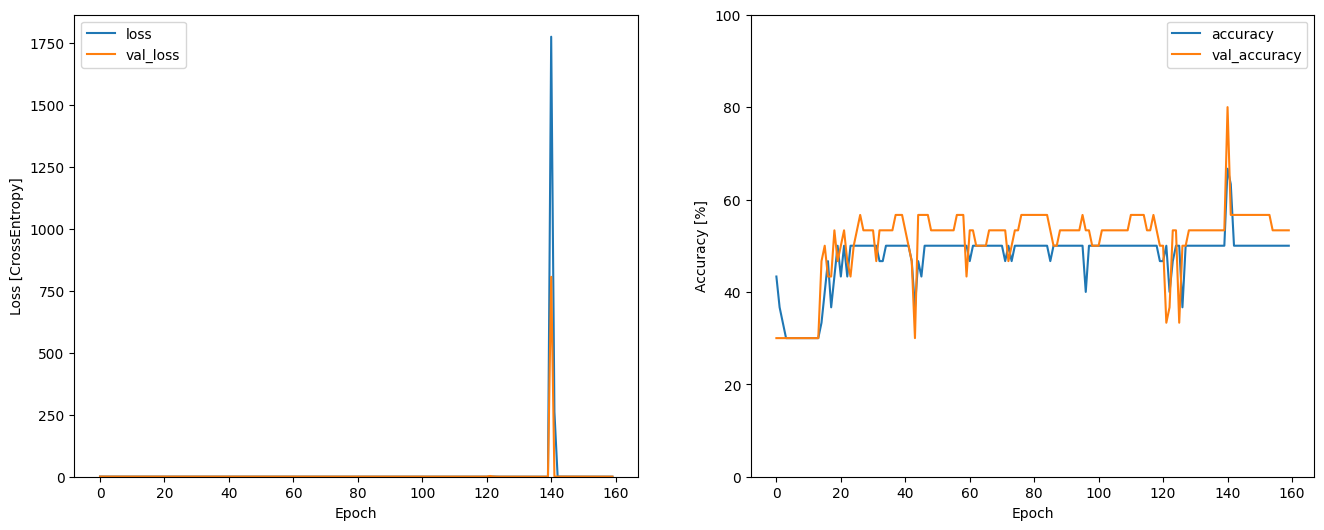

In [13]:
import matplotlib.pyplot as plt

metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [14]:
def make_peak(arr, index):
    arr[index] = (0, 0)
    arr[index-1] = (0.5, 0.4)
    arr[index+1] = (0.5, 0.4)
    return arr
pred_data = list(zip(np.random.uniform(0.1, 0.3, size=(20,)), np.random.uniform(0.4, 0.6, size=(20,))))
pred_data = make_peak(pred_data, 6)
model.predict(np.array([pred_data]))


1/1 [==============================] - 0s 128ms/step


array([[1., 0.]], dtype=float32)